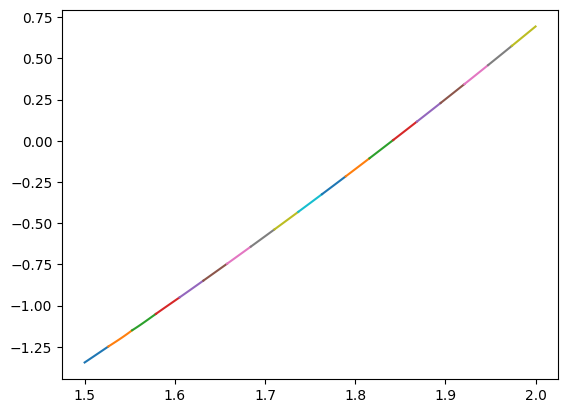

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

interval = [1.5, 2.0]


def function(x):
    return x ** 2 + np.log(x) - 4


def f_derivative_function(x):
    return 2 * x + 1 / x


def s_derivative_function(x):
    return 2 - 1 / (x * x)


def build_spline():
    c_coefficient_matrix = [0] + [h_values[i] / (h_values[i] + h_values[i + 1]) for i in range(0, n - 1)] + [0]
    a_coefficient_matrix = [0] + [h_values[i + 1] / (h_values[i] + h_values[i + 1]) for i in range(0, n - 1)] + [0]
    b_coefficient_matrix = [1] + [2] * (n - 1) + [1]

    rhs = [s_derivative_function(interval[0])] + [
        6 / (h_values[i] + h_values[i + 1]) * ((y_values[i + 1] - y_values[i]) / h_values[i + 1] \
                                               - (y_values[i] - y_values[i - 1]) / h_values[i]) for i in
        range(0, n - 1)] + [s_derivative_function(interval[1])]

    alpha = [-c_coefficient_matrix[0] / b_coefficient_matrix[0]]
    betta = [rhs[0] / b_coefficient_matrix[0]]

    moments = [s_derivative_function(interval[1])]

    for i in range(0, n - 1):
        alpha.append(-c_coefficient_matrix[i] / (alpha[i] * a_coefficient_matrix[i] + b_coefficient_matrix[i]))
        betta.append((rhs[i] - betta[i] * a_coefficient_matrix[i]) / (
                    alpha[i] * a_coefficient_matrix[i] + b_coefficient_matrix[i]))

    for i in range(0, n - 1):
        moments.append(alpha[n - i - 1] * moments[i] + betta[n - i - 1])
    moments.append(s_derivative_function(interval[0]));
    moments = moments[::-1]

    a = moments[:-1:]
    b = [(moments[i + 1] - moments[i]) / h_values[i + 1] for i in range(0, n)]
    c = [(y_values[i + 1] - y_values[i]) / h_values[i + 1] - h_values[i + 1] / 6 * (2 * moments[i] + moments[i + 1]) for
         i in
         range(0, n)]

    return [a, b, c]


def evaluate_spline(x, i):
    return y_values[i] + spline_coefficients[2][i] * (x - x_values[i]) + spline_coefficients[0][i] * (
            x - x_values[i]) ** 2 / 2 + spline_coefficients[1][i] * (x - x_values[i]) ** 3 / 6


x_values = np.linspace(*interval, 20)
n = len(x_values) - 1
h_values = [abs(x_values[_] - x_values[_ - 1]) for _ in range(0, n + 1)]
y_values = [function(_) for _ in x_values]

spline_coefficients = build_spline()

for i in range(n):
    xl = np.linspace(x_values[i], x_values[i + 1], 10)
    yl = evaluate_spline(xl, i)

    plt.plot(xl, yl)




In [13]:
def norm(lst):
    return max(list(map(np.fabs, lst)))


ns = [3, 5, 10, 20, 30, 40, 55, 70, 85, 100]
max_deviations = []
relative_deviations = []

print("=" * 56)

for num_intervals in ns:

    spline_y_values = []
    x_values = np.linspace(*interval, num_intervals)
    n = num_intervals - 1
    h_values = [abs(x_values[_] - x_values[_ - 1]) for _ in range(0, n + 1)]
    y_values = [function(_) for _ in x_values]

    spline_coefficients = build_spline()

    for i in range(n):
        xl = np.linspace(x_values[i], x_values[i + 1], 10)
        yl = evaluate_spline(xl, i)

        spline_y_values += [*yl]

    original_y_values = function(np.linspace(*interval, n * 10))

    spline_norm = norm(np.array(spline_y_values) - original_y_values)
    function_norm = norm(original_y_values)

    max_deviations.append(spline_norm)
    relative_deviations.append(spline_norm / function_norm * 100)

    print(num_intervals, spline_norm, spline_norm / function_norm * 100, sep='\t')


n	∆                       δ
3	0.05371643350201083	3.9951684278292565
5	0.04343490397994143	3.230478007069501
10	0.022010032911421007	1.6369997568788763
20	0.011168471008359937	0.8306568372238579
30	0.00746909969040388	0.555515497250833
40	0.0056090498036676095	0.417173986148873
55	0.004083074671390463	0.3036793389307547
70	0.00320965733824341	0.23871878354359727
85	0.002644010127457186	0.1966486807744287
100	0.002247842609951256	0.16718365759838455


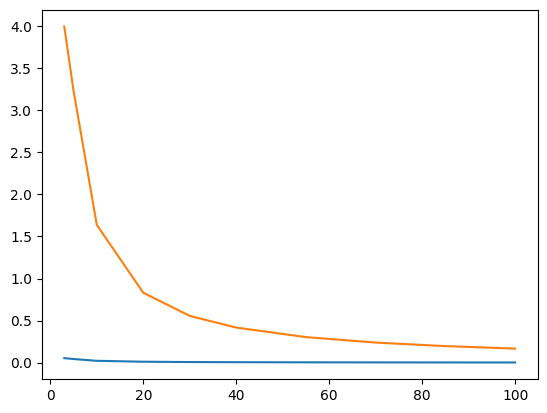

In [14]:
plt.plot(ns, max_deviations)
plt.plot(ns, relative_deviations)